## 경사하강법

* 최적의 매개변수 값을 찾는 것
* 오차를 적게 하는 매개변수를 찾는 것
* 경사하강법 식은 fit 할때 생김
* 출력층에서 계산된다고 생각하면 됨

## 신경망의 목적은 오차를 최소화할 수 있는 가중치(W)와 편향(B)을 구하는 것
* 오차를 구하기 위해서는 예측값이 필요
* 예측값을 통해 오차를 구할 수 있음
* 방향은 미분에 의해서 결정되고, 얼만큼 갈지에 대한 것은 [에타]러닝 레이트( 하이퍼 파라미터 ) 에 의해 결정진다 ( 일반적으로 0.01 정도로 움직인다 )

In [129]:
import numpy as np

# 미분코드

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    return grad
    

# 배치미분을 사용해서 여러개를 한번에 작업 할 수 있게 한다. 
# 여러개를 한다는 의미는 편미분을 한다고도 볼 수 있다.

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        return grad

In [130]:
# f : 비용함수 또는 손실함수 ( Cost Function, Loss Function)
# init_x : 초기값
# lr : 학습률
# step_num : 갱신할 횟수 ( 미분 횟수 )
# 경사하강법 공식

def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x

In [131]:
# x[0] = -3.0, x[1] = 4.0
 
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

# function_2 에 대한 최소값

array([-6.11110793e-10,  8.14814391e-10])

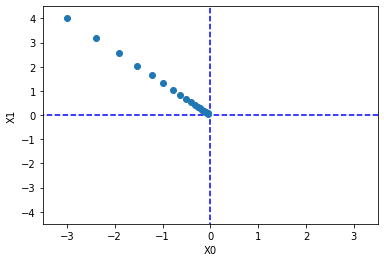

In [132]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )  # <- 이것만 바뀜

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [133]:
# 학습률이 너무 큰 예. lr = 10.0
init_x = np.array([-3.0, 4.0])
result, _ = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)
print("Learning Rate 10.0 : {}".format(result))


# 학습률이 너무 작은 예. lr = 1e-10
init_x = np.array([-3.0, 4.0])
result, _ = gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)
print("Learning Rate 1e-10 : {}".format(result))

Learning Rate 10.0 : [-2.58983747e+13 -1.29524862e+12]
Learning Rate 1e-10 : [-2.99999994  3.99999992]


In [134]:
%cd common/
!unzip common.zip

[Errno 2] No such file or directory: 'common/'
/content/common
Archive:  common.zip
replace functions.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [135]:
import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class SimpleNet:
  # 가중치와 편향을 미리 만들어두어야 한다.
  
  def __init__(self):
    self.W = np.random.randn(2, 3) # 2 x 3 형태로 정규분포로 이루어진 가중치의 초기값 생성

  def predict(self, x):
    return np.dot(x, self.W) # 입력값과 가중치의 내적을 return

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss


In [136]:
net = SimpleNet()
net.W

array([[ 0.43577756,  2.13201476,  1.13767521],
       [ 1.74076816,  1.02548652, -1.22860829]])

In [137]:
x = np.array([0.6, 0.9])
p = net.predict(x)

In [138]:
p

array([ 1.82815789,  2.20214673, -0.42314233])

In [139]:
np.argmax(p)

1

In [140]:
t = np.array([0, 1, 0]) # 원 핫 인코딩 되어있음
net.loss(x, t)

0.5655428159014214

In [141]:
def f(w):
  return net.loss(x, t)  # loss 안에 있는 x t 가 미분을 해야하는 대상이 된다.

dW = numerical_gradient(f, net.W) # 기울기의 벡터를 구하는 것
dW

# 절대값으로 이해해서 -와 + 상관없이 값의 차이가 가장 큰 W 가 loss 에 가장 영향을 준다.
# 변화량이 가장 큰 것은 5번째 W 
# 결국 0에 최대한 가까이 가는게 목적이기 때문에 그 차가 가장 큰 것이 변화량이 크고, loss 에 영향을 많이 주는 것.

array([[ 0.23448641, -0.25916899,  0.02468257],
       [ 0.35172962, -0.38875348,  0.03702386]])

## MNIST 데이터셋 분류 신경망 만들기

# 변수

params : 신경망의 매개변수를 보관합니다.

params['W1']은 1번째 층의 가중치, 

params['b1']은 1번째 층의 편향

params['W2']는 2번째 층의 가중치, 

params['b2']도 2번째 층의 편향

grads : 각 매개변수의 기울기를 보관합니다.

grads['W1']은 1번째 층의 가중치의 기울기,

grads['b1']은 1번째 층의 편향의 기울기

grads['W2']은 2번째 층의 가중치의 기울기, 

grads['b2']은 2번째 층의 편향의 기울기


# 메소드

init : 초기화 작업을 수행합니다.

input_size : 입력층의 뉴런 수

hidden_size : 은닉층의 뉴런 수

output_size : 출력층의 뉴런 수

weight_init_std : 생성되는 가중치가 정규분포를 가지기 위한 상숫값

predict : 예측(추론)을 수행합니다.

x : 이미지 데이터

loss : 손실 함수의 값을 구합니다.

x : 이미지 데이터

t : 정답 레이블

accuracy : 정확도를 구합니다. 매개변수는 loss와 같습니다.

numerical_gradient : 가중치 매개변수의 기울기를 구합니다. 매개변수는 loss와 같습니다.

gradient : numerical_gradient의 개선판 입니다.

오차역전파법을 배우고 나서 구현할 예정입니다. 
매개변수는 loss와 같습니다.

In [179]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

  # 신경망 초기화
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 사용할 매개변수를 준비 ( 매개변수에 대한 초기 설정 )
    # 가중치는 정규분포로 이루어진 랜덤값을 사용
    # 편향은 0으로 초기화 하는 것이 일반적

    # 가중치를 담아놓을 딕셔너리
    self.params = {}

    # 1층 ( 은닉층 ) 의 매개변수 설정
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) # 784개의 입력을 받는 100개의 뉴런 생성
    self.params['b1'] = np.zeros(hidden_size)

    # 2층 ( 출력층 ) 매개변수 설정
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) # 100개의 입력을 받는 10개의 뉴런
    self.params['b2'] = np.zeros(output_size)
    
  # 예측 ( 소프트 맥스를 사용할 예정)
  def predict(self, x):
    # 가중치, 편향 불러오기
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    # 1-1 1층의 내적 구하기 (Dense, Affine)
    z1 = np.dot(x, W1) + b1
    # 1-2 내적에 대한 활성화 함수 적용 (시그모이드)
    a1= sigmoid(z1)

    # 2-1 2층의 내적 구하기
    z2 = np.dot(a1,W2) + b2
    # 2-2 2층의 출력함수 적용하기 (소프트맥스)    
    # 시그모이드 소프트맥스를 바로 사용할 수 있는 이유는 from common.functions import * 덕분
    y = softmax(z2)
    
    return y

  # 비용 함수
  def loss(self, x, t):
    pred = self.predict(x)
    # 예측한 결과물, 정답에 대한 loss를 구하면 된다.
    return cross_entropy_error(pred, t)

  # 정확도 확인하기
  def accuracy(self, x, t):
    y = self.predict(x) # 소프트맥스의 결과
    y = np.argmax(y, axis=1)  # axis=1 을 준 이유 : 각각의 행에서 인덱스를 추출 하기 위함
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0]) # 데이터의 개수 60000개 
    return accuracy

  # TwolayerNet 의 미분 수행 함수
  # x : 입력 데이터, t : 정답 레이블
  def numerical_gradient(self, x, t):
    loss_W = lambda W : self.loss(x, t)

    # 각 층에서 구해지는 기울기를 저장할 딕셔너리
    grads = {}

    # 1층의 가중치들의 기울기를 구한다. ( LOSS에 대한 W1 의 기울기 )
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    
    # 2층의 가중치들의 기울기를 구한다. ( LOSS에 대한 W2 의 기울기 )
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    
    return grads


In [150]:
# 신경망 생성하기
input_size=28*28
hidden_size=100
output_size=10   # 숫자의 개수만큼


net = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b1'].shape)

(784, 100)
(100,)
(100, 10)
(100,)


In [151]:
net.params['W1'].shape, net.params['W2'].shape

((784, 100), (100, 10))

In [152]:
# 100개의 데이터를 임의로 준비
x = np.random.rand(100, 784) # 100장의 미니배치
y = net.predict(x)

In [153]:
# 예측이 잘된것을 확인할 수 있다
x.shape, y.shape

((100, 784), (100, 10))

1. 변환기
 - 사이킷 런 변환기
 - 만들어보기
 - numpy
 

In [154]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [157]:
from sklearn.preprocessing import OneHotEncoder

y_train_dummy = OneHotEncoder().fit_transform(y_train.reshape(-1,1))
y_train_dummy = y_train_dummy.toarray()

y_test_dummy = OneHotEncoder().fit_transform(y_test.reshape(-1,1))
y_test_dummy = y_test_dummy.toarray()

In [158]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = X_train / 255.0
X_train.shape

(60000, 784)

In [159]:
X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test / 255.0
X_test.shape

(10000, 784)

## 전처리 결과 확인

In [160]:
X_train.shape, y_train_dummy.shape

((60000, 784), (60000, 10))

In [161]:
X_test.shape, y_test_dummy.shape

((10000, 784), (10000, 10))

In [163]:
y_train_dummy[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## 훈련
* 미니배치 선정
* 반복 횟수 설정
* 학습률 설정

In [170]:
from tqdm import tqdm_notebook

iter_nums = 100000 # 반복 횟수
train_size = X_train.shape[0]  # 배치를 만들기 위한 전체 데이터 개수
batch_size = 100 # 배치 크기 설정, 600개의 배치가 생긴다.
learning_rate = 0.1

network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

for i in tqdm_notebook(range(iter_nums)):
  # 미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)

  X_batch = X_train[batch_mask] # 랜덤하게 100개의 데이터를 추출해서 배치 데이터로 만들기
  t_batch = y_train[batch_mask] # 랜덤하게 100개의 데이터를 추출해서 배치 데이터에 대한 정답 만들기

  # 기울기 계산
  # numerical_gradient 함수 내부에서 벌어지는 일
  # 1. 예측
  # 2. cross_entropy_error 를 통한 Loss 구하기
  # 3. 구해진 Loss 값을 이용해 미분을 수행
  grad = network.numerical_gradient(X_batch, t_batch)

  # 매개변수 갱신 ( 경사 하강법 수행 )
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss= network.loss(X_batch, t_batch)
  print("Step {} => Loss : {}".format(i, loss))
  # train_loss_list.append(loss)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


Step 0 => Loss : 2.284893061495402
Step 1 => Loss : 2.2983583150921674
Step 2 => Loss : 2.2962229412802553
Step 3 => Loss : 2.2846422052085504
Step 4 => Loss : 2.28839549237259
Step 5 => Loss : 2.28918992727196
Step 6 => Loss : 2.2685409153819993
Step 7 => Loss : 2.2841931043484283
Step 8 => Loss : 2.3082334748031403
Step 9 => Loss : 2.2926079652800277


KeyboardInterrupt: ignored

In [180]:
network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iter_nums):
  batch_mask = np.random.choice(train_size, batch_size)
  X_batch = X_train[batch_mask]
  t_batch = y_train[batch_mask]

  grad = network.numerical_gradient(X_batch, t_batch)

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  loss = network.loss(X_batch, t_batch)
  print("Loss: {}".format(loss))

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(X_train, y_train_dummy)
    test_acc = network.accuracy(X_test, y_test_dummy)
    # train_acc_list.append(train_acc)
    # test_acc_list.appedn(test_acc)

    print("train acc : {}, /  test acc : {}".format(train_acc, test_acc))

Loss: 2.2915190271551107
train acc : 0.0993, /  test acc : 0.1032
Loss: 2.2913500887615554
Loss: 2.29505094384488
Loss: 2.29020930327256
Loss: 2.299371666334739
Loss: 2.2904381987335167
Loss: 2.292763319663791
Loss: 2.2942070290061904
Loss: 2.28695286311015
Loss: 2.2897990415517837
Loss: 2.2936262112385317
Loss: 2.2901042895340424
Loss: 2.2936953698793814
Loss: 2.299097176896642
Loss: 2.293761072451909
Loss: 2.295154744943696


KeyboardInterrupt: ignored